In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import pickle
import global_variables as gv
import output_functions as of
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
run = 128
range_profile = pickle.load(open(
    'Outputs/Logs/run{}/range_profiles{}'.format(run, run), 'rb'))
site_profile = pickle.load(
    open('Outputs/Logs/run{}/site_summary{}'.format(run, run), 'rb'))
days_summary = pickle.load(
    open('Outputs/Logs/run{}/days_summary'.format(run),'rb'))
status = pickle.load(
    open('Outputs/Logs/run{}/status'.format(run),'rb'))
journeys_range = pickle.load(
    open('Outputs/journeys_range','rb'))

In [6]:
heatplot = of.createHeatmap(site_profile)
heatplot.write_image(
    'Outputs/Logs/run{}/heatplot{}.png'.format(run,run),
    width=1800, height=1000)
heatplot.write_html("Outputs/Logs/run{}/heatplot{}.html".format(run,run))

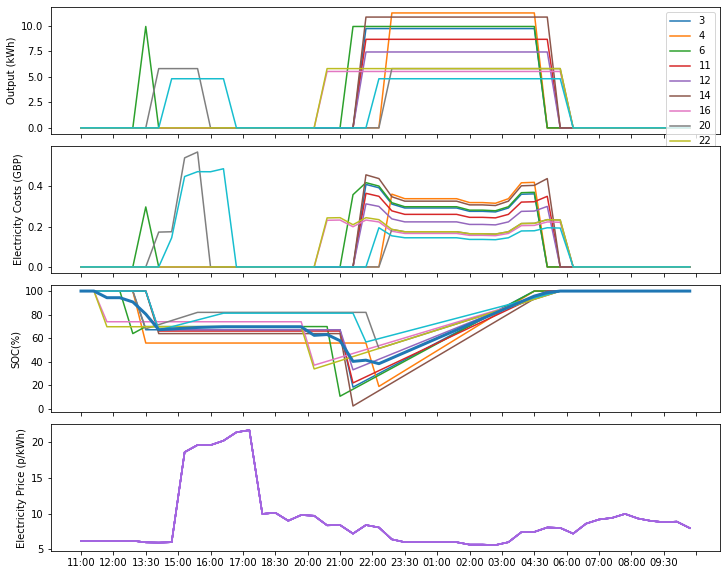

In [242]:
idxs
day = idxs[12]
profile = range_profile[range_profile['date']==day]

fig, axs = plt.subplots(
    4,
    figsize=(12,10),
    sharex=True, 
    gridspec_kw={'hspace':0.1})
ca='opt'
x = profile.unstack().index.strftime('%H:%M')
cols = gv.CAT_COLS

axs[0].plot(
    x, 
    profile.unstack()[cols['OUTPUT'][ca]]*2)
axs[0].legend(profile.unstack()[cols['OUTPUT'][ca]].columns)
# axs[0].plot(
#     x,
#     range_profile[cols['OUTPUT'][ca]].groupby('from').sum()*2, linewidth=3)
axs[0].set_ylabel('Output (kWh)')

axs[1].plot(
    x, 
    profile.unstack()[cols['ECOST'][ca]]/100)
# axs[1].plot(
#     x,
#     range_profile[cols['ECOST'][ca]].groupby('from').sum()/100, linewidth=3)
axs[1].set_ylabel('Electricity Costs (GBP)')

axs[2].plot(
    x, 
    profile.unstack()[cols['SOC'][ca]])
axs[2].plot(
    x,
    profile[cols['SOC'][ca]].groupby('from').mean(), linewidth=3)
axs[2].set_ylabel('SOC(%)')

axs[3].plot(
    x, 
    profile.unstack()[cols['PRICE']['opt']], 
    color=gv.FPS_PURPLE)
axs[3].set_ylabel('Electricity Price (p/kWh)')
for ax in fig.get_axes():
    ax.xaxis.set_major_locator(plt.MaxNLocator(24))
fig.show()

In [243]:
journeys_range.loc[day]

,Branch_ID,Start_Time_of_Route,End_Time_of_Route,Energy_Required,Vehicle_ID,Next_Departure,Previous_Arrival
Route_ID,,,,,,,
2446540,513,2019-08-22 05:21:00,2019-08-22 13:53:59,24.664500,3,2019-08-22 14:15:00,2019-08-21 21:45:00
2446541,513,2019-08-22 05:21:00,2019-08-22 13:42:59,33.128833,4,2019-08-22 14:18:59,2019-08-21 22:29:00
2446543,513,2019-08-22 05:29:59,2019-08-22 13:25:00,27.104153,6,2019-08-22 14:10:00,2019-08-21 19:42:59
2446544,513,2019-08-22 05:55:00,2019-08-22 12:17:00,19.557033,16,2019-08-22 12:45:00,2019-08-21 22:29:00
2446558,513,2019-08-22 12:45:00,2019-08-22 20:05:00,27.685567,16,2019-08-23 06:01:59,2019-08-22 12:17:00
2446560,513,2019-08-22 12:53:00,2019-08-22 20:09:00,26.900593,22,2019-08-23 06:19:00,2019-08-22 12:23:00
2446571,513,2019-08-22 14:10:00,2019-08-22 21:23:59,44.411767,6,2019-08-23 05:29:59,2019-08-22 13:25:00
2446574,513,2019-08-22 14:15:00,2019-08-22 21:52:00,36.598513,3,2019-08-23 05:16:59,2019-08-22 13:53:59
2446575,513,2019-08-22 14:18:59,2019-08-22 22:54:59,27.664320,4,2019-08-23 05:27:59,2019-08-22 13:42:59


In [244]:
journeys_range.loc[day].groupby('Vehicle_ID').sum()

,Branch_ID,Energy_Required
Vehicle_ID,,
3,1026,61.263013
4,1026,60.793153
6,1026,71.515920
11,1026,58.554400
12,1026,50.181007
14,1026,73.263960
16,1026,47.242600
20,1026,47.023133
22,1026,49.637587


In [245]:
site_profile[site_profile['date']==day]

,Electricity_Price,Available,Battery_Use,Session,Return,Output_Opt,Ch_Opt,ChDelivered_Opt,ECost_Opt,SoC_Opt,N_Opt,Br_Opt,date
from,,,,,,,,,,,,,
2019-08-22 11:00:00,6.20,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,100.000000,0,False,2019-08-22
2019-08-22 11:30:00,6.20,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,100.000000,0,False,2019-08-22
2019-08-22 12:00:00,6.20,0,-42.294027,0,2,0.000000,0.0,0.000000,0.000000,94.360796,0,False,2019-08-22
2019-08-22 12:30:00,6.18,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,94.360796,0,False,2019-08-22
2019-08-22 13:00:00,6.20,0,-27.104153,0,1,0.000000,0.0,0.000000,0.000000,90.746909,0,False,2019-08-22
2019-08-22 13:30:00,5.98,1,-81.819480,399,3,4.966383,0.0,4.469745,29.698972,80.433611,1,False,2019-08-22
2019-08-22 14:00:00,5.94,1,-102.188240,3592,4,2.902663,0.0,2.612396,17.241816,67.156832,1,False,2019-08-22
2019-08-22 14:30:00,6.00,2,0.000000,9675,0,5.308852,0.0,4.777967,31.853113,67.793894,2,False,2019-08-22
2019-08-22 15:00:00,18.60,2,0.000000,9675,0,5.308852,0.0,4.777967,98.744650,68.430957,2,False,2019-08-22


In [200]:
# Calculates how much charging occurs between arrival and 10pm
days_summary['Charge_late'] = 0
vehicles = profile.index.get_level_values('Vehicle_ID').unique()
for date in days_summary.index:
    profile = range_profile[range_profile['date']==date]
    cutoff = dt.datetime.combine(
        date.to_pydatetime(), dt.time(22,0,0))
    charge = 0
    for veh in vehicles:  
        temp = profile.loc[
            (slice(cutoff), veh), ['Session', 'Output_Opt']]
        last_session = temp['Session'].max()
        charge += temp[temp['Session']==last_session]['Output_Opt'].sum()
    days_summary.loc[date,'Charge_late'] = charge
days_summary['Ratio'] = days_summary['Charge_late'] / days_summary['Output_Opt']
days_summary['Ratio'].describe()